In [32]:
def rho_l(T,P):
  return 998.0
def drho_ldT(T,P):
  return 0
def mu_l(T,P):
  return 24.141e-6 * 10**(247.8 / (T - 140))
def dmu_ldT(T,P):
  return -mu_l(T,P)*247.8/(T-140)**2*np.log(10)
def nu_l(T,P):
  return mu_l(T,P)/rho_l(T,P)
def dnu_ldT(T,P):
  return (dmu_ldT(T,P)*rho_l(T,P)-mu_l(T,P)*drho_ldT(T,P))/rho_l(T,P)**2
def k_l(T,P):
  return 0.68
def dk_ldT(T,P):
  return 0
def cp_l(T,P):
  return 4182.0
def dcp_ldT(T,P):
  return 0

def rho_v(T,P):
  R, M = 8.314, 18
  return P/(T*R/M*1000)
def drho_vdT(T,P):
  return -rho_v(T,P)/T
def mu_v(T,P):
  a0 = -2.77567e-6
  a1 = 0.04035e-6
  return a0+a1*T
def dmu_vdT(T,P):
  return 0.04035e-6
def nu_v(T,P):
  return mu_v(T,P)/rho_v(T,P)
def dnu_vdT(T,P):
  return (dmu_vdT(T,P)*rho_v(T,P)-mu_v(T,P)*drho_vdT(T,P))/rho_v(T,P)**2
def k_v(T,P):
  a0 = -21.994433e-3
  a1 = 0.11842e-3
  return a0 + a1 * T
def dk_vdT(T,P):
  return 0.11842e-3
def cp_v(T,P):
  return 2030.0
def dcp_vdT(T,P):
  return 0

def rho_s(T):
  return 8.4e3
def k_s(T):
  return 21.7
def cp_s(T):
  return 625

def T_sat(P):
  p=P/1e6
  a0 = 429.69474687605754
  a1 = 11.983108526790891
  a2 = -0.2940193901122584
  a3 = 25.197563642164386
  return a0 + a1 * p + a2 * p**2 + a3 * np.log(p)
def dT_satdP(P):
  p=P/1e6
  a1 = 11.983108526790891
  a2 = -0.2940193901122584
  a3 = 25.197563642164386
  return (a1 + 2 * a2 * p + a3 / p) / 1e6
def h_fg(P):
	T = T_sat(P)
	a0 = -2511.1589762597114
	a1 = 1.790037469059945
	a2 = 0.0028969464729942194
	a3 = 222.03437607975306
	return a0 + a1 * T + a2 * T**2 + a3 * np.sqrt(650 - T)
def h_l_sat(P):
  T=T_sat(P)
  return cp_l(T,P)*T
def h_v_sat(P):
  return h_l_sat(P)+h_fg(P)

def h_to_T(h,P):
  h_m_s1=h_l_sat(P)
  h_m_s0=h_v_sat(P)
  T=T_sat(P)
  if(h<h_m_s1):
    return h/cp_l(T,P)
  elif(h>h_m_s0):
    return T+(h-h_m_s0)/cp_v(T,P)
  else:
    return T
def h_to_S(h,P):
  h_m_s1=h_l_sat(P)
  h_m_s0=h_v_sat(P)
  T=T_sat(P)
  if(h<=h_m_s1):
    return 1
  elif(h>=h_m_s0):
    return 0
  else:
    nu_r,h_r = nu_v(T,P)/nu_l(T,P), h_fg(P)/(h_m_s0-h)
    return 1/((nu_r*(h_r-1))**(0.33)+1)

def k_rl(S):
  return S**3
def dk_rldS(S):
  return 3*S**2
def k_rv(S):
  return (1-S)**3
def dk_rvdS(S):
  return -3*(1-S)**2
def rho(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1):
    return rho_l(T,P)
  elif(h>=h_s0):
    return rho_v(T,P)
  else:
      return rho_l(T,P)*S+rho_v(T,P)*(1-S)
def drhodS(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1) or (h>=h_s0):
    return 0
  else:
    return rho_l(T,P) - rho_v(T,P)
def nu(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1):
    return nu_l(T,P)
  elif(h>=h_s0):
    return nu_v(T,P)
  else:
    return 1/(k_rl(S)/nu_l(T,P)+k_rv(S)/nu_v(T,P))
def dnudS(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1) or (h>=h_s0):
    return 0
  else:
    return -nu(h,P)**2*(dk_rldS(S)/nu_l(T,P)+dk_rvdS(S)/nu_v(T,P))
def mu(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1):
    return mu_l(T,P)
  elif(h>=h_s0):
    return mu_v(T,P)
  else:
    return nu(h,P)*rho(h,P)
def dmudS(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1) or (h>=h_s0):
    return 0
  else:
    return drhodS(h,P)*nu(h,P)+rho(h,P)*dnudS(h,P)
def cp(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1):
    return cp_l(T,P)
  elif(h>=h_s0):
    return cp_v(T,P)
  else:
    return (S*rho_l(T,P)*cp_l(T,P)+(1-S)*rho_v(T,P)*cp_v(T,P))/rho(h,P)
def dcpdS(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1) or (h>=h_s0):
    return 0
  else:
    return (rho_l(T,P)*cp_l(T,P)-rho_v(T,P)*cp_v(T,P)-cp(h,P)*drhodS(h,P)) / rho(h,P)
def k(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1):
    return k_l(T,P)
  elif(h>=h_s0):
    return k_v(T,P)
  else:
    return S*k_l(T,P)+(1-S)*k_v(T,P)
def dkdS(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1) or (k>=h_s0):
    return 0
  else:
    return k_l(T,P)-k_v(T,P)
  
def lam(h,P):
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  return k_rl(S)*nu(h,P)/nu_l(T,P)
def dlamdS(h,P):
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  return (dk_rldS(S)*nu(h,P)+k_rl(S)*dnudS(h,P))/nu_l(T,P)
  
def Re_l(T,P,v,D):
  return v*D/nu_l(T,P)
def dRe_ldT(T,P,v,D):
  return v*D/nu_l(T,P)**2*dnu_ldT(T,P)
def Re_v(T,P,v,D):
  return v*D/nu_v(T,P)
def dRe_vdT(T,P,v,D):
  return v*D/nu_v(T,P)**2*dnu_vdT(T,P)
def Pr_l(T,P):
  return mu_l(T,P)*cp_l(T,P)/k_l(T,P)
def dPr_ldT(T,P):
  return (dmu_ldT(T,P)*cp_l(T,P)+mu_l(T,P)*dcp_ldT(T,P)-Pr_l(T,P)*dk_ldT(T,P))/k_l(T,P)
def Pr_v(T,P):
  return mu_v(T,P)*cp_v(T,P)/k_v(T,P)
def dPr_vdT(T,P):
  return (dmu_vdT(T,P)*cp_v(T,P)+mu_v(T,P)*dcp_vdT(T,P)-Pr_l(T,P)*dk_ldT(T,P))/k_l(T,P)
def Nu_l(T,P,v,D):
  return 2+1.1*Pr_l(T,P)**0.33*Re_l(T,P,v,D)**0.6
def dNu_ldT(T,P,v,D):
  return 1.1*(0.33*Pr_l(T,P)**-0.67*dPr_ldT(T,P)*Re_l(T,P,v,D)**0.6+0.6*Pr_l(T,P)**0.33*Re_l(T,P,v,D)**-0.4*dRe_ldT(T,P,v,D))
def Nu_v(T,P,v,D):
  return 2+1.1*Pr_v(T,P)**0.33*Re_v(T,P,v,D)**0.6
def dNu_vdT(T,P,v,D):
  return 1.1*(0.33*Pr_v(T,P)**-0.67*dPr_vdT(T,P)*Re_v(T,P,v,D)**0.6+0.6*Pr_v(T,P)**0.33*Re_v(T,P,v,D)**-0.4*dRe_vdT(T,P,v,D))
def h_sl(T,P,v,D):
  return Nu_l(T,P,v,D)*k_l(T,P)/D
def dh_sldT(T,P,v,D):
  return (dNu_ldT(T,P,v,D)*k_l(T,P)+Nu_l(T,P,v,D)*dk_ldT(T,P))/D
def h_sv(T,P,v,D):
  return Nu_v(T,P,v,D)*k_v(T,P)/D
def dh_svdT(T,P,v,D):
  return (dNu_vdT(T,P,v,D)*k_v(T,P)+Nu_v(T,P,v,D)*dk_vdT(T,P))/D
def qsf_l(T,P,v,T_s,D,alpha_sf):
  return h_sl(T,P,v,D)*alpha_sf*(T_s-T)
def dqsf_ldT(T,P,v,T_s,D,alpha_sf):
  return dh_sldT(T,P,v,D)*alpha_sf*(T_s-T)-h_sl(T,P,v,D)*alpha_sf
def dqsf_ldT_s(T,P,v,T_s,D,alpha_sf):
  return h_sl(T,P,v,D)*alpha_sf
def qsf_v(T,P,v,T_s,D,alpha_sf):
  return h_sv(T,P,v,D)*alpha_sf*(T_s-T)
def dqsf_vdT(T,P,v,T_s,D,alpha_sf):
  return dh_svdT(T,P,v,D)*alpha_sf*(T_s-T)-h_sv(T,P,v,D)*alpha_sf
def dqsf_vdT_s(T,P,v,T_s,D,alpha_sf):
  return h_sv(T,P,v,T_s,D)*alpha_sf
def q_boil(h,P,T_s,alpha_sf):
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  return S*alpha_sf*mu(h,P)*h_fg(P)*np.sqrt(9.81*(rho_l(T,P)-rho_v(T,P))/0.072)*(cp_l(T,P)*(T_s - T_sat(P))/0.006/h_fg(P))**3*Pr_l(T,P)**(-1.7/0.33)
def dq_boildS(h,P,T_s,alpha_sf):
  S = h_to_S(h,P)
  return q_boil(h,P,T_s,alpha_sf) * (1/S + dmudS(h,P)/mu(h,P))
def dq_boildT_s(h,P,T_s,alpha_sf):
  return q_boil(h,P,T_s,alpha_sf) * 3 / (T_s - T_sat(P))
def qsf(h,P,v,T_s,D,alpha_sf):
  h_m_s0 = h_v_sat(P)
  h_m_s1=h_l_sat(P)
  T = h_to_T(h,P)
  if(h<h_m_s1):
    return qsf_l(T,P,v,T_s,D,alpha_sf)
  elif(h>h_m_s0):
    return qsf_v(T,P,v,T_s,D,alpha_sf)
  else:
    s = h_to_S(h,P)
    return q_boil(h,P,T_s,alpha_sf)+(1-s)*h_sv(T,P,v,D)*alpha_sf*(T_s-T)
def dqsfdT(h,P,v,T_s,D,alpha_sf):
  h_s0 = h_v_sat(P)
  h_s1 = h_l_sat(P)
  T = h_to_T(h,P)
  if(h<=h_s1):
    return dqsf_ldT(T,P,v,T_s,D,alpha_sf)
  elif(h>=h_s0):
    return dqsf_vdT(T,P,v,T_s,D,alpha_sf)
  else:
    S = h_to_S(h,P)
    return dq_boildS(h,P,T_s,alpha_sf) - h_sv(T,P,v,D)*alpha_sf*(T_s-T)
def dqsfdT_s(h,P,v,T_s,D,alpha_sf):
  h_s0 = h_v_sat(P)
  h_s1 = h_l_sat(P)
  T = h_to_T(h,P)
  if(h<=h_s1):
    return dqsf_ldT_s(T,P,v,T_s,D,alpha_sf)
  elif(h>=h_s0):
    return dqsf_vdT_s(T,P,v,T_s,D,alpha_sf)
  else:
    S = h_to_S(h,P)
    return dq_boildT_s(h,P,T_s,alpha_sf) - (1-S)*h_sv(T,P,v,D)*alpha_sf


def h_inject(h,P,v,D):
  h_s0 = h_v_sat(P)
  h_s1 = h_l_sat(P)
  T = h_to_T(h,P)
  if(h<=h_s1):
    return h_sl(T,P,v,D)
  elif(h>=h_s0):
    return h_sv(T,P,v,D)
  else:
    S = h_to_S(h,P)
    return S * h_sl(T,P,v) + (1-S) * h_sv(T,P,v)
def beta(h,P):
  h_s0 = h_v_sat(P)
  h_s1 = h_l_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1) or (h>=h_s0):
    return 1
  else:
    return (rho_v(T,P) / rho(h,P) * (1-S) * h_fg(P) + cp_l(T,P) * T_sat(P)) / ((1-lam(h,P)) * h_fg(P) + cp_l(T_sat(P),P) * T_sat(P))
  


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, simplify

In [34]:
def gamma(h,P):
    e = 0.3

    h_l = h_l_sat(P)
    h_v = h_v_sat(P)

    T = h_to_T(h,P)
    S = h_to_S(h,P)

    if(h<h_l):
        return k_l(T,P) * e / cp_l(T,P)
    elif(h>h_v):
        return k_v(T,P) * e / cp_v(T,P)
    else:
        nu_ = nu(h,P)
        K = 3.67e-12
        l = lam(h,P)
        D = K / nu_ * l * (1-l) * (e/K)**0.5 * 0.072 * (1.417 - 2* 2.12 * (1-S) + 3*1.263 * (1-S)**2)
        dlds = dlamdS(h,P)
        return D / (dlds + 1e-10)

In [35]:
gamma(h_l_sat(101325)+0.1,101325)

0.006237326159254249

In [36]:
gamma(h_l_sat(101325),101325)

0.0

In [37]:
P=101325
dlamdS(h_l_sat(P),P)

3.0

In [38]:
P=101325
h_list = np.linspace(h_l_sat(P) - h_fg(P), h_v_sat(P) + h_fg(P), 1000)
r = []
ref = gamma(h_list[0],P)
for h in h_list:
    r.append(gamma(h,P)/ref)

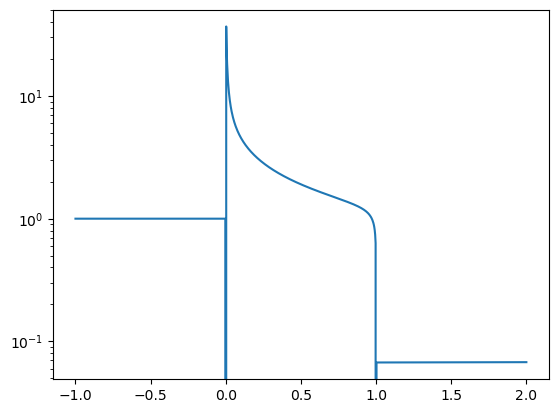

In [44]:
plt.plot((h_list - h_l_sat(P)) / h_fg(P),r)
plt.yscale('log')

In [42]:
s_r = []

m = 0.001
m_flux = m  /(0.06 * 0.06 * np.pi / 4)
alpha_sf = 6 * (1-0.3) / 100e-6

ref = qsf(h_list[0],P, m_flux / rho(h_list[0],P) , h_to_T(h_list[0],P) + 1, 100e-6 , alpha_sf)
for h in h_list:
    s_r.append(qsf(h,P, m_flux / rho(h,P) , h_to_T(h,P) + 1, 100e-6 , alpha_sf) / ref)

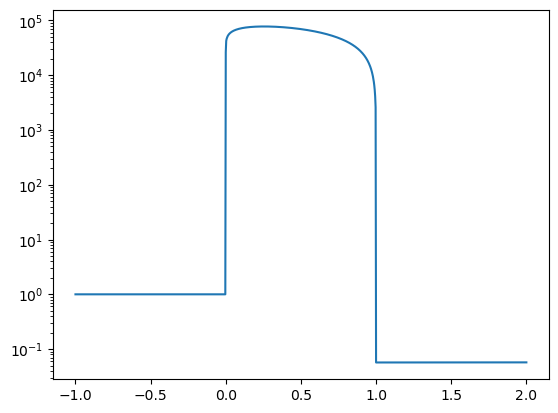

In [45]:
plt.plot((h_list - h_l_sat(P)) / h_fg(P),s_r)
plt.yscale('log')